<font size="15">Group Project<font>
- Jashan Bains (47733738)
- Priyansh Bahri (89605810)
- Nora Zhou (14167290)
- Mofei Zhang (63342869)

<font size= "5">Introduction:<font>

Video games have become an integral part of modern entertainment, with millions of players engaging in online gaming communities. Understanding player behavior is crucial for game developers and marketers, as it allows them to tailor content, improve user experiences, and optimize monetization strategies. One significant factor in player behavior is experience level, which can impact playtime, engagement, and subscription rates. Our project aims to investigate whether player experience can be predicted using measurable characteristics such as age, playtime, and subscription status.

The broad question we aim to address is "Which kinds of players are most likely to to contribute a large amount of data? Can we target those players in our recruiting efforts?" To explore this, we have formulated the more specific question: "Can we predict a player's type based on their in-game behaviour, such as players' age, time spend playing, and newsletter subscription." By exploring this question, we hope to identify characteristics of players who contribute the most data, allowing for more effective recruitment strategies.

To address this question, we analyzed data from the `players.csv` dataset, which contains detailed information on various players. In general, there are 196 observations in this dataset, the number of variables are 7, including `experience`, `subscribe`, `hashedEmail`, `played_hours`, `name`, `gender` and `Age`. 

-	`experience` : the level of experience of the player (e.g., Pro, Veteran, Regular, Amateur). (Type: character)
-	`subscribe` : whether the player is a subscriber (True/False). (Type: logical)
-	`hashedEmail` : hashed version of the player's email. (Type: character)
-	`played_hours` : number of hours the player has spent playing. (Type: double - numeric values with decimal points) 
-	`name`: player's name (Type: character)
-	`gender` : player's gender (Male, Female, etc.) (Type: character)
-	`Age` : player's age (Type: double)

The dataset includes attributes such as experience level, age, total hours played, gender, and whether or not a player is subscribed to the game’s updates or premium features. These variables provide insight into how different factors might correlate with a player's experience level.

<font size= "5">Methods and Results:<font>

<font size= "3.5">Description<font>

To start the analysis, of course we need to load the necessary libraries. From those that will allow us to wrangle and clean data, make effective visualizations, and use complex algorithms like K-Nearest Neighbors, we will use nearly everything introduced in the course thus far. After that, we first load the dataset. We concluded that based on the nature of our question, players.csv would be sufficient to produce the results we were looking for. After that, we sorted the data out for only the characteristics we were looking for, such as `experience`, `Age`, `played_hours`, `gender`, and subscriptions, making sure to exclude any instances of NA so there would be no interference with our data. 

We then calculated the means of our two quantitative variables, one for age and the other for playtime, to help develop effective and noteworthy visualizations viewers could reference. This also helped us see the general direction in which the data was skewed; older or younger audiences and more or less playtime for players. We also decided to modify the `subscribe` column to where TRUE corresponds to 1, and FALSE to 0, to add another predictor variable. 

We made two noteworthy visualizations, one that simply counts up the amount of players who belong to a certain experience level, and the other that compares the average playtime for each experience level. Like stated earlier, these will be a good shorthand way to reference the dataset for new viewers and help them see the relationships clearly as opposed to having to read them off an extensive table.

From here, we set the seed as we intended to use 5-fold cross validation later and use testing/training splits, which require randomization. More on these later, but what this means is that our randomization is tied to a specific 'dice roll' and would otherwise not be replicable with a different seed. The data is now split into a training and testing set so that we can perform 5-fold cross validation to help decide the best k to use when making classifications on player experience level. We then make the recipe for the training data using `Age`, `subscribe`, and `played_hours` as the predictor variables to predict `experience`. We also make the model of K-Nearest Neighbors using *tune( )* so that we can swap it in later for the best k value once we compute what it is. Then, we choose to do 5-fold cross validation with v = 5, and strata = experience. This essentially allows for multiple splits to happen to help predict experience, and thus reduces the risk of human influence on the initial split to play a significant role in finding our ideal k value. We also have to provide a range in which to test the best k values from, so we make an arbitrary tibble of size 10 consisting of 10 possible k values, and from there, we'll pick the best one. 

We then combined everything into a workflow and collected the accuracy metric. We graphed this against the k-values tibble we made earlier on an accuracy vs k-values graph. We found the best k value to be 2. Now that we know our k-value, the *nearest_neighbors* model needs to be remade with our known k-value, and then paired with the recipe and fit onto the training data. From here, we can finally predict - the whole purpose of classification - and find what the algorithm believes similar occurrences of our data would result in. 

After this, we were meant to obtain accuracy, but we could not manage to get it to work, and we believe this is because a huge amount of the predictions don't match the truth value. A workaround for this is to find all instances where `.pred_class` == `experience`, so that we can find the instances where the predictions were made correctly. 

The rest of the process is explained further within the discussion section. Furthermore, none of it pertains to the code and instead to what we can infer and extrapolate based on the results we gathered.

In [1]:
# loading in the needed libraries
library(tidyverse)
library(readr)
library(ggplot2)
library(dplyr)
library(tidyr)
library(lubridate)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# loading in the raw data
players_data <- read_csv ("https://raw.githubusercontent.com/jashanbains-24/DSCI-100-Group-Project/refs/heads/main/players.csv")

# cleaning and wrangling data
minecraft_data <- players_data |>
                  select(experience, subscribe, played_hours, gender, Age)|>
                  drop_na(Age)|>
                  drop_na(played_hours)|>
                  drop_na(subscribe)



Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# average playtime and age
playtime_mean <-  minecraft_data|>
                    summarize(average_total_playtime=mean(played_hours,na.rm=TRUE),
                             average_total_age=mean(Age, na.rm=TRUE))

playtime_mean

# changing the subscribe columns into a DBL to be used as a predictor
minecraft_data <- minecraft_data|>
                        mutate(subscribe = as.double(subscribe))


average_total_playtime,average_total_age
<dbl>,<dbl>
5.904639,20.52062


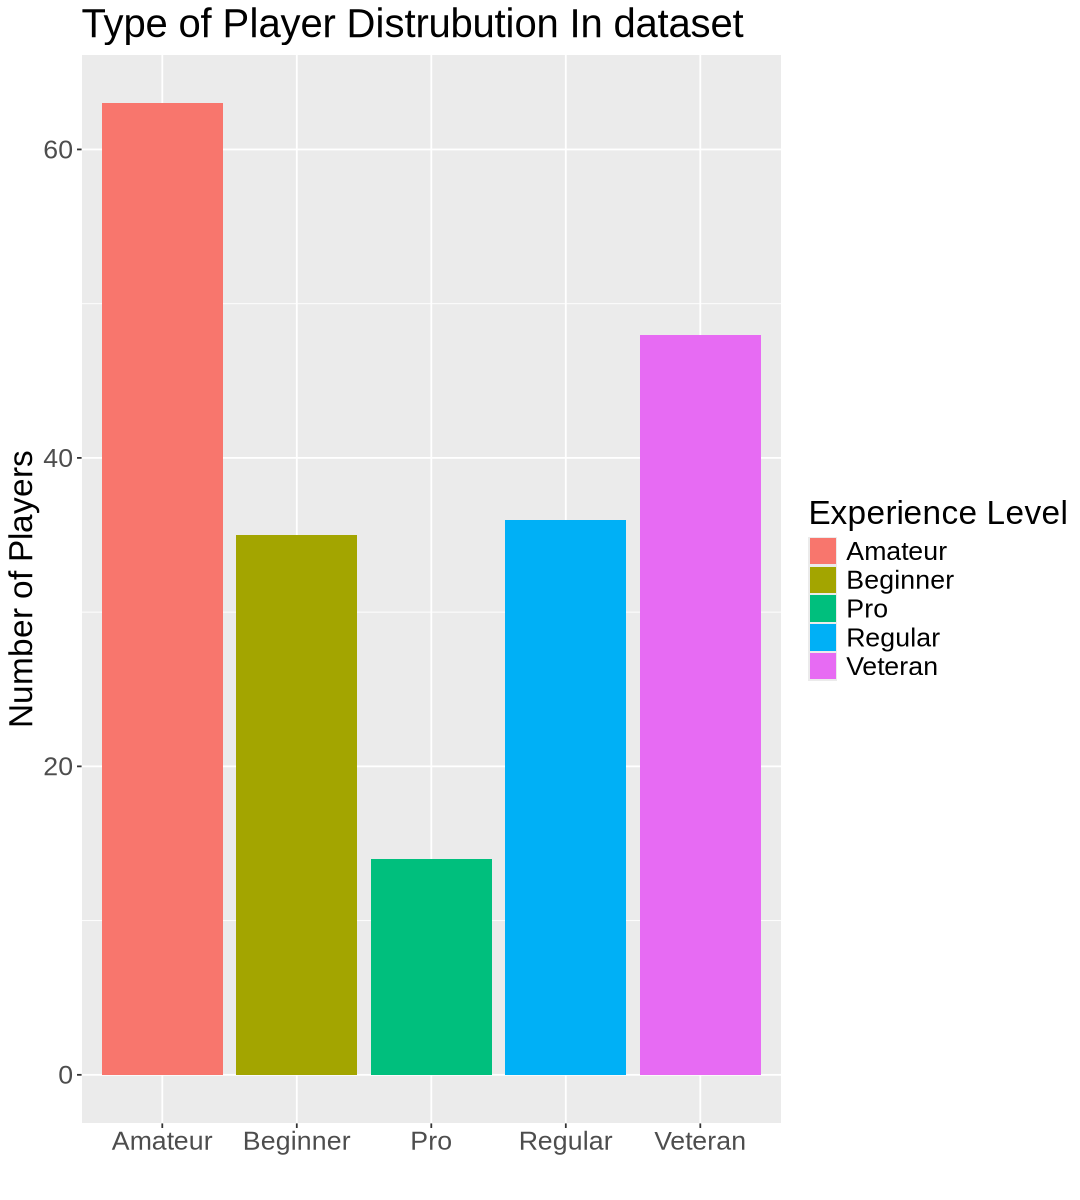

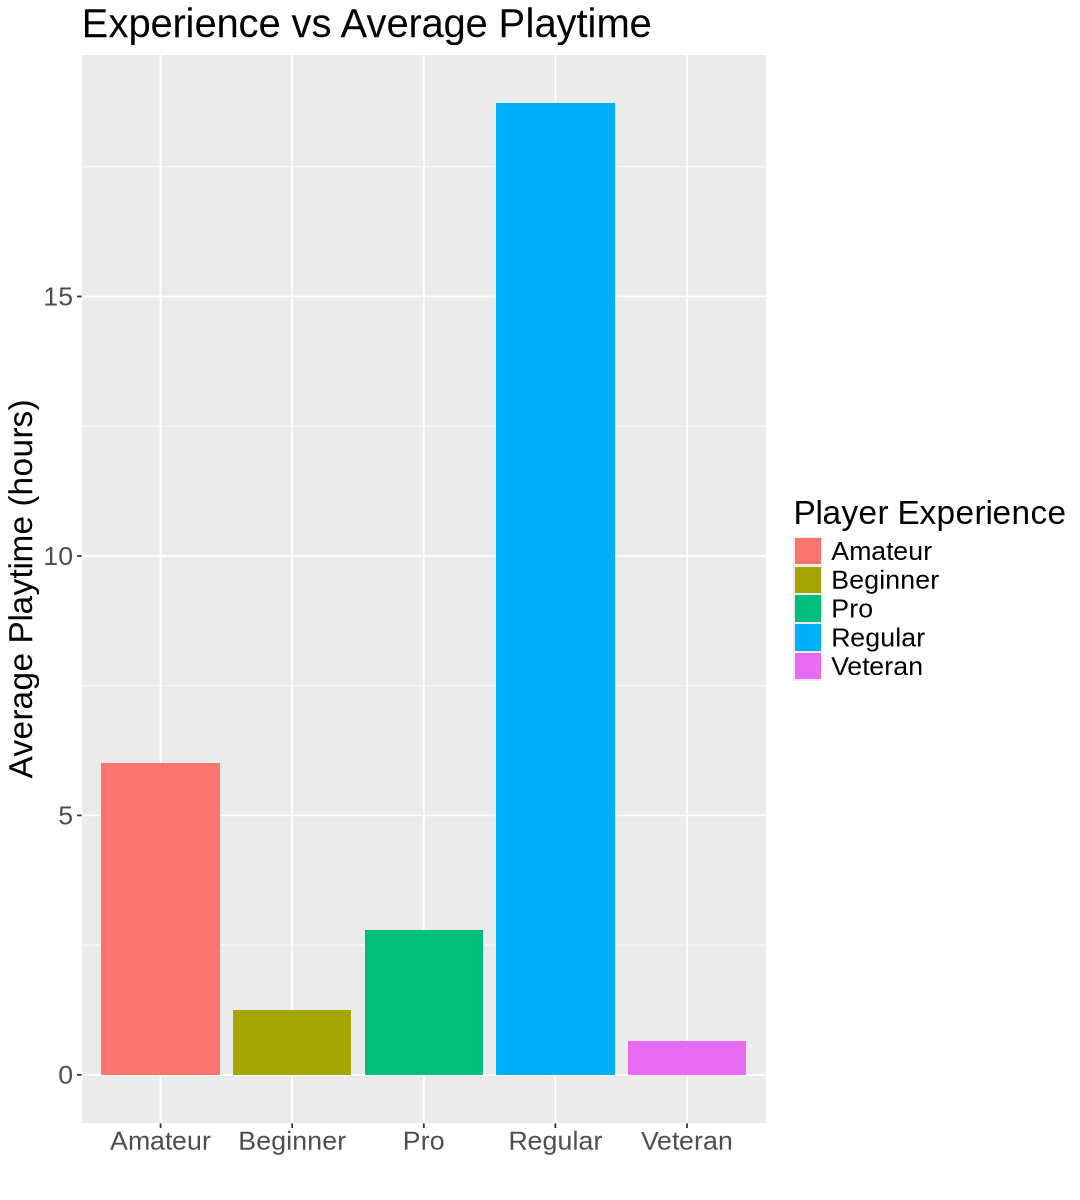

In [4]:
options(repr.plot.width=9,repr.plot.height=10)
# visualizing the distribution of player types in the dataset
player_type_viz <- players_data|>
                    group_by(hashedEmail)|>
                    ggplot(aes(x = experience, fill = experience))+
                    geom_bar()+
                    labs(title="Type of Player Distrubution In dataset",
                         y="Number of Players",
                         x="",
                        fill="Experience Level")+
                        theme(text=element_text(size=20))


player_type_viz

# visualizing the relationship between player type and hours played
experienceplaytime <- minecraft_data|>
                        group_by(experience)|>
                        summarize(avg_playtime=mean(played_hours,na.rm=TRUE))|>
                        ggplot(aes(x=experience,y=avg_playtime,fill=experience))+
                        geom_bar(stat="identity")+
                        labs(x="",
                             y="Average Playtime (hours)",
                             title="Experience vs Average Playtime",
                             fill="Player Experience")+
                        theme(text=element_text(size=20))

experienceplaytime


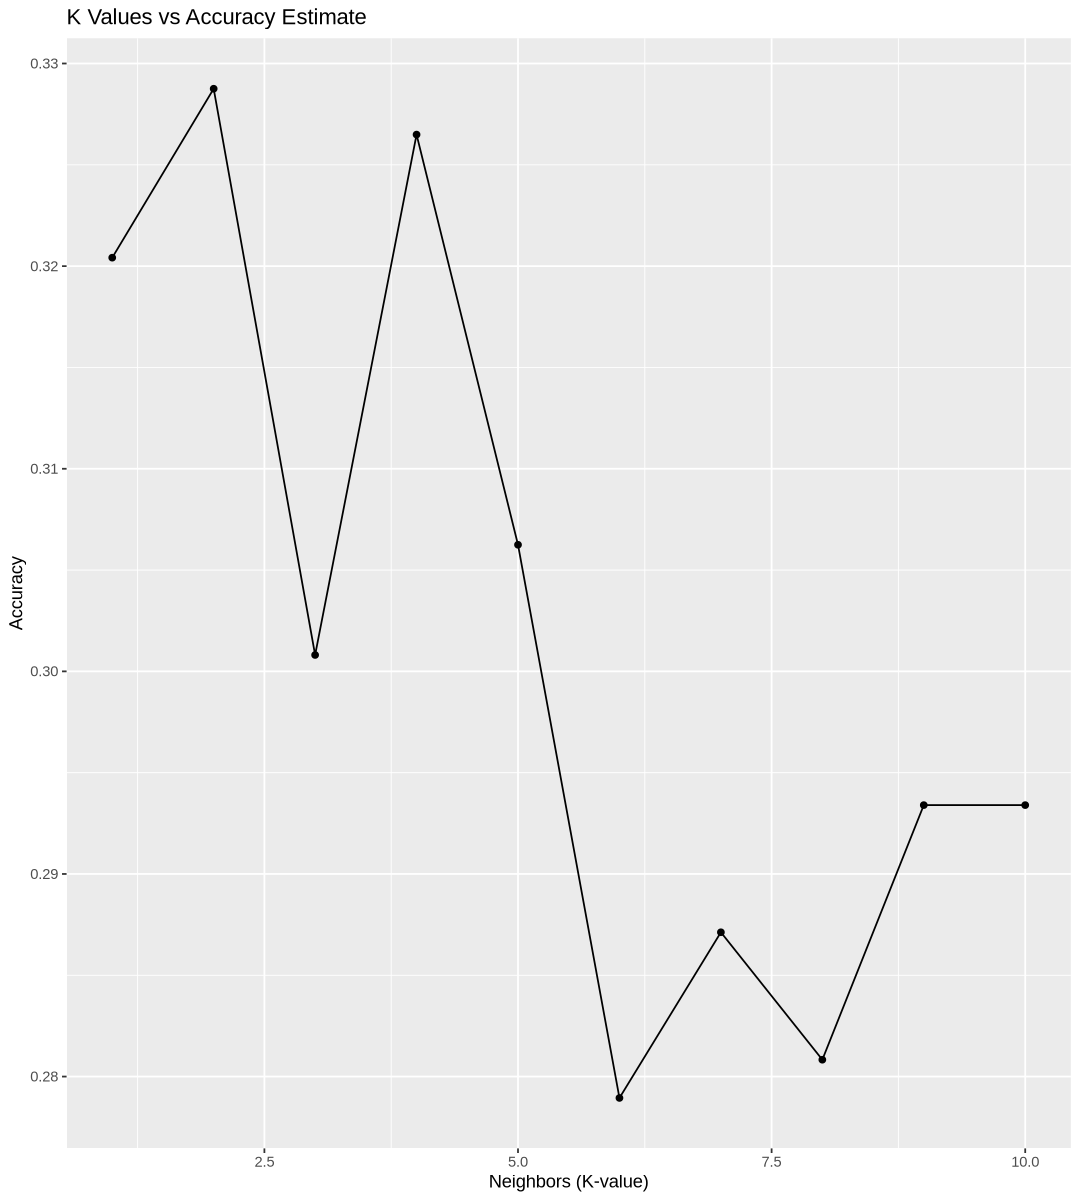

In [5]:

# performing Knn Classification for Data Analysis
set.seed(3456) # Don't change

# splitting the data into training and testing
minecraft_split <- initial_split(minecraft_data, prop = 0.8, strata = experience)
minecraft_training <- training(minecraft_split)
minecraft_testing <- testing(minecraft_split)

# creating the recipe
minecraft_recipe <- recipe(experience ~ Age + played_hours+subscribe, data = minecraft_training) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

# creating knn classification model
minecraft_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                    set_engine("kknn") |>
                    set_mode("classification")

# 5-fold cross validation
minecraft_vfold <- vfold_cv(minecraft_training, v = 5, strata = experience)

# k values tibble for tuning
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

# workflow
knn_results <- workflow() |>
                add_recipe(minecraft_recipe) |>
                add_model(minecraft_spec) |>
                tune_grid(resamples = minecraft_vfold, grid = k_vals) |>
                collect_metrics()


# filtering for accuracy
accuracies <- knn_results |>
                filter(.metric == "accuracy")

# accuracy visualization
accuracy_plot <- accuracies |>
                    ggplot(aes(x = neighbors, y = mean)) +
                    geom_point() +
                    geom_line()+
                    labs(x="Neighbors (K-value)",
                         y="Accuracy",
                         title="K Values vs Accuracy Estimate")
accuracy_plot

In [6]:
# finding the best value for K
best_k <- accuracies |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

[1] 2

In [7]:
# predicing on the testing data
minecraft_finalspec <- nearest_neighbor(weight_func="rectangular",neighbors=best_k)|>
                        set_engine("kknn")|>
                        set_mode("classification")

minecraft_fit <- workflow()|>
                    add_recipe(minecraft_recipe)|>
                    add_model(minecraft_finalspec)|>
                    fit(minecraft_training)


minecraft_test_predictions <- predict(minecraft_fit,minecraft_testing)|>
                                    bind_cols(minecraft_testing)|>
                                    mutate(experience =as_factor(experience ))

minecraft_test_predictions


minecraft_prediction_true <- minecraft_test_predictions|>
                                filter(.pred_class==experience)

minecraft_prediction_true

.pred_class,experience,subscribe,played_hours,gender,Age
<fct>,<fct>,<dbl>,<dbl>,<chr>,<dbl>
Regular,Pro,1,30.3,Male,9
Amateur,Amateur,0,0.0,Male,21
Amateur,Veteran,1,1.6,Female,23
Pro,Beginner,1,1.5,Female,25
Regular,Amateur,1,0.2,Male,22
Veteran,Amateur,0,0.0,Male,22
Pro,Beginner,1,1.0,Male,17
Amateur,Regular,1,0.6,Female,28
Regular,Veteran,0,0.1,Male,18


.pred_class,experience,subscribe,played_hours,gender,Age
<fct>,<fct>,<dbl>,<dbl>,<chr>,<dbl>
Amateur,Amateur,0,0.0,Male,21
Amateur,Amateur,1,0.0,Male,20
Veteran,Veteran,0,0.3,Male,22
Amateur,Amateur,0,0.0,Prefer not to say,17


<font size= "5">Discussion:<font>

- <font size= "4">Summarizing what we found:<font>

What we find is that out of 41 different predictions, 4 were correct, giving an accuracy of below 10%. We think this is because the relationship between the experience level of a player has close to no correlation to any of the categories we observed, at least not to a huge extent. This is likely because complete beginners would not be too inclined to play the game as they are not as familiar with the basics. Similarly, for the veterans, they already know the game and may mostly be former players who got bored of the game, but still obviously know more about the game than the rest of the batch. For anyone in between, their hours would be higher than these two categories as they will not only know what the basics of the game are, they may have discovered what makes the game fun for them, thus enticing them to continue playing even more. We think generally subscriptions follow the trend of higher experience levels being subscribed, but those lower than them would not be as willing to stay up to date on information about the game. Therefore, these varying relationships make accuracy a different metric to obtain.

In terms of answering our specific question however, we feel that we did an excellent job. It is conclusive that it is not possible and not even worth trying to predict player type based on age, played hours, and whether or not they are subscribed. This could change if we had a larger dataset, one which is maybe more balanced between the amount of each player type. It is also possible that if we had access to a greater number of statistics about each player, it would make predictions a lot more accurate. Note that the greatest variation is with `Age`. Players of similar age tend to have similar information about them, which leads to the idea that if we separate the dataset by age, and then predict, our predictions would be a lot more accurate. However, we would once again need a much larger dataset for this to be feasible. In conclusion, while our current model struggled to make accurate predictions due to weak correlations and an imbalanced dataset, the analysis still offered valuable insights into player behavior. We were able to conclude that we are not in fact able to predict player type with our chosen parameters. With a larger and more detailed dataset, especially one that accounts for age groups, future predictions could potentially yield much better results.

- <font size= "4">Is this what we expected to find?<font>

Based on the results we obtained, we don't think this is in line with what we expected, for a few reasons. Firstly, we assumed that with a dataset of such size, it would be pretty possible to make classifications on the data provided. We performed all the right steps to the best of our ability, not only referencing our notes, but also the methods used in the textbook, on piazza, and previous assignments to cross-check any mistakes that arose. Up until the final stages of the process, everything seemed to carry out in a similar manner to problems presented in these aforementioned resources.

However, when we take a step back and look at the bigger picture, 196 players who each have a plethora of characteristics that differentiate them, each of which could vary slightly from entry to entry, alongside some missing data; this does not sound like the recipe for a successul algorithm. Now it does make sense as to why we got the results we did. A more expansive dataset which had for the sake of the argument, 1000 observations, would somewhat homogenize certain aspects of the data, reducing drastic variablity from person to person, and thus making it easier to see patterns as viewers. Not just this, but in terms of training, the K-NN algorithm would have had a better sample size to study, and thus make predictions more accurately. We also think due to the nature of our question, it was difficult to really get results much better than this, as it restricts us to basically only focus on the `players.csv` data, which as mentioned earlier, is quite small when it comes to datasets.

- <font size= "4"> What impact could such findings have?<font>

Our findings suggest that predicting player experience level using basic demographic and playtime-related factors is not particularly effective. This has several implications for game developers, researchers, and data analysts working in the gaming industry. If experience level cannot be reliably determined from these common factors, it indicates that more complex behavioral and psychological attributes must be considered. For example, in-game achievements, social interactions, and playstyle preferences could offer better predictive power when analyzing player experience.

One major impact of these findings is that relying on simplistic models to segment players may lead to inaccurate or ineffective engagement strategies. Instead, game developers may need to integrate more sophisticated data collection techniques, such as tracking in-game decisions, participation in events, or engagement with community features. Additionally, companies might consider conducting player surveys or psychological assessments to understand motivation and preferences more deeply.

Another key takeaway from our findings is that players with regular experience levels may represent the most engaged audience segment. Unlike beginners, who may struggle with the game's mechanics, or veterans and pro, who may lose interest over time, players with regular experience are actively learning and exploring the game, making them more likely to continue playing. This presents an opportunity for targeted engagement strategies. Therefore, game developers can focus on and promote the game to the regular experience group, create a more immersive and engaging experience that sustains these players' interest, increases retention.

- <font size= "4"> What future questions could this lead to?<font>

One potential future question that arises from this study is whether incorporating more complex behavioral data could improve the prediction of player experience level. The current model relies primarily on basic demographic information and overall playtime, which, as shown by the low prediction accuracy, are insufficient indicators of experience. Future research could explore the predictive power of more detailed in-game behaviors, such as achievement unlocks, frequency of logins, player progression over time, and participation in multiplayer or community-based activities. These variables might better capture the depth of engagement and skill development, thereby offering a more accurate and nuanced understanding of player experience. By expanding the data inputs beyond simple metrics, game developers and analysts could build more effective models for player classification and tailor experiences more precisely to individual user profiles.

Another future question that emerges from this study is how temporal patterns in gameplay relate to a player’s experience level. Specifically, researchers could ask: Do experienced players exhibit more consistent or structured playtime patterns compared to beginners? Or, is there a correlation between frequency of play sessions over time and the likelihood of advancing in experience level? Instead of using total playtime as a static measure, future studies could explore how the timing, regularity, and progression of gameplay sessions influence or reflect experience. For example, it would be worth investigating whether players with frequent, evenly distributed sessions are more likely to gain experience than those with irregular or burst-like activity. These questions could help reveal whether time-based behavioral trends provide stronger predictive value than total playtime alone.

In summary, this study opens the door to a range of important research questions that go beyond demographic and basic usage metrics. By exploring how detailed behavioral patterns and temporal dynamics influence player experience, future research can develop richer models of player classification. These questions are essential not only for improving prediction accuracy but also for informing game design strategies that are more responsive to player needs and engagement styles.
